In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load dataset (replace 'your_dataset.csv' with the path to your dataset)
data = pd.read_csv('heart.csv')

# Separate features (X) and labels (y)
X = data.drop('target', axis=1)  # Assuming 'heart_disease_label' is the column indicating presence/absence of heart disease
y = data['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Example of how to save the model
model.save('heart_disease_model.h5')


Epoch 1/50
7/7 [==============================] - 1s 38ms/step - loss: 0.7629 - accuracy: 0.4922 - val_loss: 0.6612 - val_accuracy: 0.6327
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 0.7507 - accuracy: 0.4974 - val_loss: 0.6338 - val_accuracy: 0.6939
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.7143 - accuracy: 0.6269 - val_loss: 0.6158 - val_accuracy: 0.7347
Epoch 4/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6602 - accuracy: 0.5855 - val_loss: 0.5971 - val_accuracy: 0.7551
Epoch 5/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6444 - accuracy: 0.6321 - val_loss: 0.5797 - val_accuracy: 0.7551
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6099 - accuracy: 0.6425 - val_loss: 0.5656 - val_accuracy: 0.7755
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6337 - accuracy: 0.6477 - val_loss: 0.5539 - val_accuracy: 0.7755
Epoch 8/50
7/7 [================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


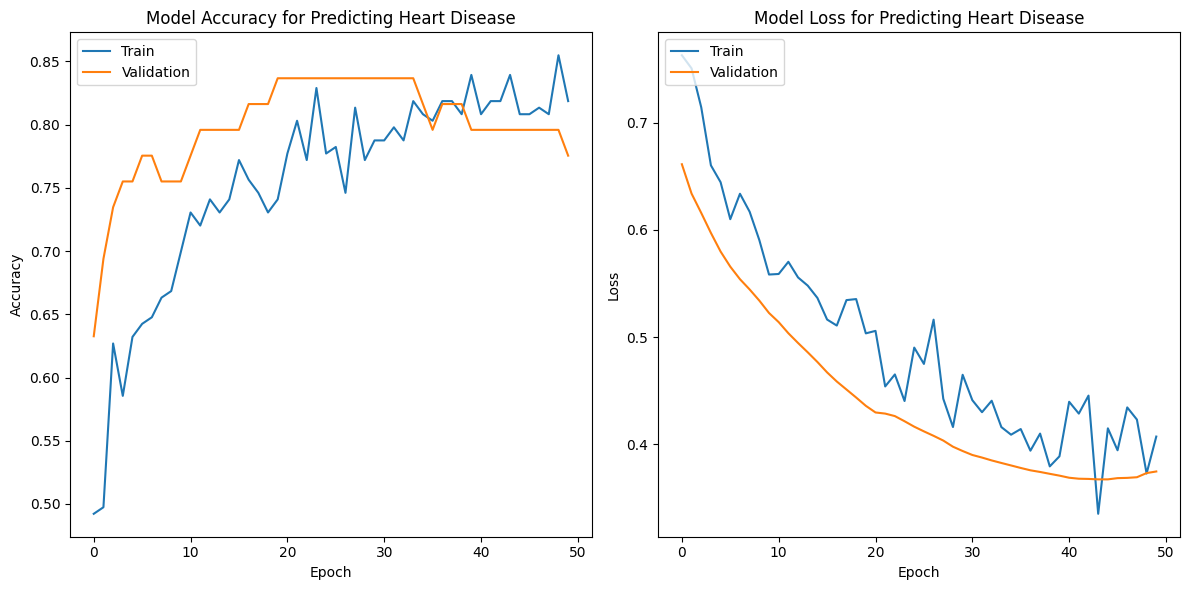

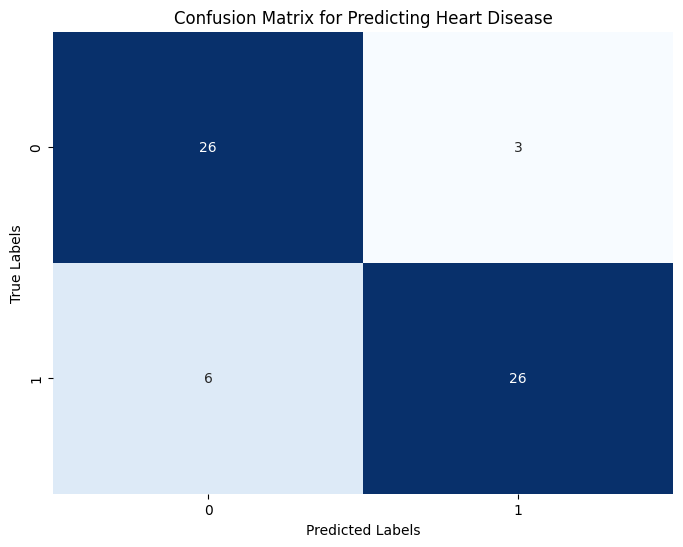

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy for Predicting Heart Disease')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss for Predicting Heart Disease')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Visualize training history
plot_history(history)

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix for Predicting Heart Disease')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Visualize confusion matrix
plot_confusion_matrix(y_test, y_pred)
